In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Sale_data=pd.read_csv("P:/all_data.csv")

# Data Cleaning

In [4]:
Sale_data.shape
Sale_data.drop_duplicates(inplace=True)
Sale_data.shape
Sale_data.dropna(thresh=3,inplace=True)
Sale_data.shape

(185687, 6)

In [5]:
Sale_data1=Sale_data

In [6]:
Sale_data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09-01-2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
Sale_data1["Quantity Ordered"].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [8]:
k=Sale_data["Quantity Ordered"] == "Quantity Ordered"
Sale_data1[~k]
Sale_data1=Sale_data1[~k]

In [9]:
Sale_data1["Quantity Ordered"]=Sale_data1["Quantity Ordered"].astype(int)

<ipython-input-9-54a40f93d6be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sale_data1["Quantity Ordered"]=Sale_data1["Quantity Ordered"].astype(int)


In [10]:
Sale_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  int32 
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: int32(1), object(5)
memory usage: 5.7+ MB


In [11]:
Sale_data1["Price Each"].unique()
Sale_data1["Price Each"]=Sale_data1["Price Each"].astype(float)

<ipython-input-11-19e29c6eb8d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sale_data1["Price Each"]=Sale_data1["Price Each"].astype(float)


In [12]:
Sale_data1["Sale"]=Sale_data1["Price Each"] * Sale_data1["Quantity Ordered"]

<ipython-input-12-4ebc35841ca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sale_data1["Sale"]=Sale_data1["Price Each"] * Sale_data1["Quantity Ordered"]


In [13]:
df_1=pd.DataFrame(Sale_data1["Product"].value_counts()).reset_index()
df_1.columns=["Item","Count"]
df_1

,Item,Count
0,USB-C Charging Cable,21859
1,Lightning Charging Cable,21610
2,AAA Batteries (4-pack),20612
3,AA Batteries (4-pack),20558
4,Wired Headphones,18849
5,Apple Airpods Headphones,15525
6,Bose SoundSport Headphones,13298
7,27in FHD Monitor,7498
8,iPhone,6840
9,27in 4K Gaming Monitor,6225


# Which product sold the most

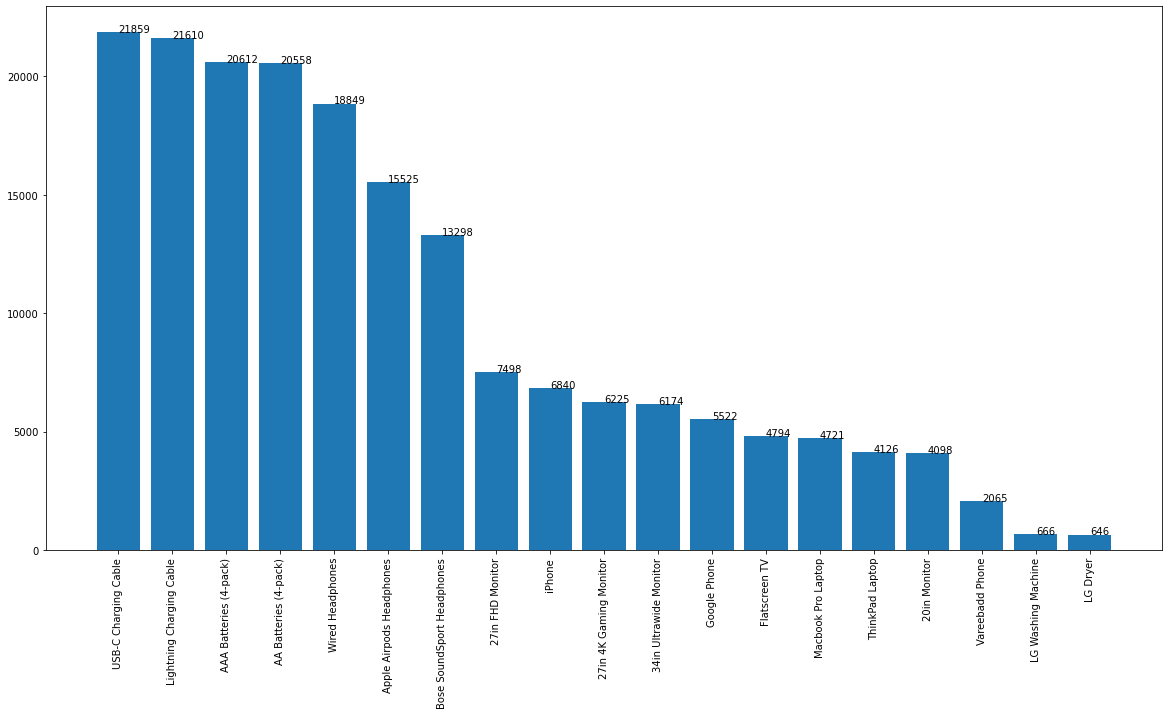

In [14]:
plt.figure(figsize=(20,10))
plt.bar(df_1["Item"],df_1["Count"])
for x,y in zip(df_1["Item"],df_1["Count"]):
    plt.text(x,y,y)
plt.xticks(rotation="vertical")
plt.show()

In [44]:
Sale_data1["Order Date"]=pd.to_datetime(Sale_data1["Order Date"])

<ipython-input-44-399deed44bff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sale_data1["Order Date"]=pd.to_datetime(Sale_data1["Order Date"])


In [16]:
Sale_data1["Hour"]=Sale_data1["Order Date"].dt.hour

<ipython-input-16-42b43e0a3ad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sale_data1["Hour"]=Sale_data1["Order Date"].dt.hour


In [17]:
Sale_data1["Month"]=Sale_data1["Order Date"].dt.month

<ipython-input-17-0ea9d30a4990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sale_data1["Month"]=Sale_data1["Order Date"].dt.month


In [18]:
Sale_data1["Date"]=Sale_data1["Order Date"].dt.date


<ipython-input-18-4fccbb57ffbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sale_data1["Date"]=Sale_data1["Order Date"].dt.date


# Which month have the most order

In [19]:
df_2=pd.DataFrame(Sale_data1["Month"].value_counts()).reset_index()
df_2.columns=["Month","count"]

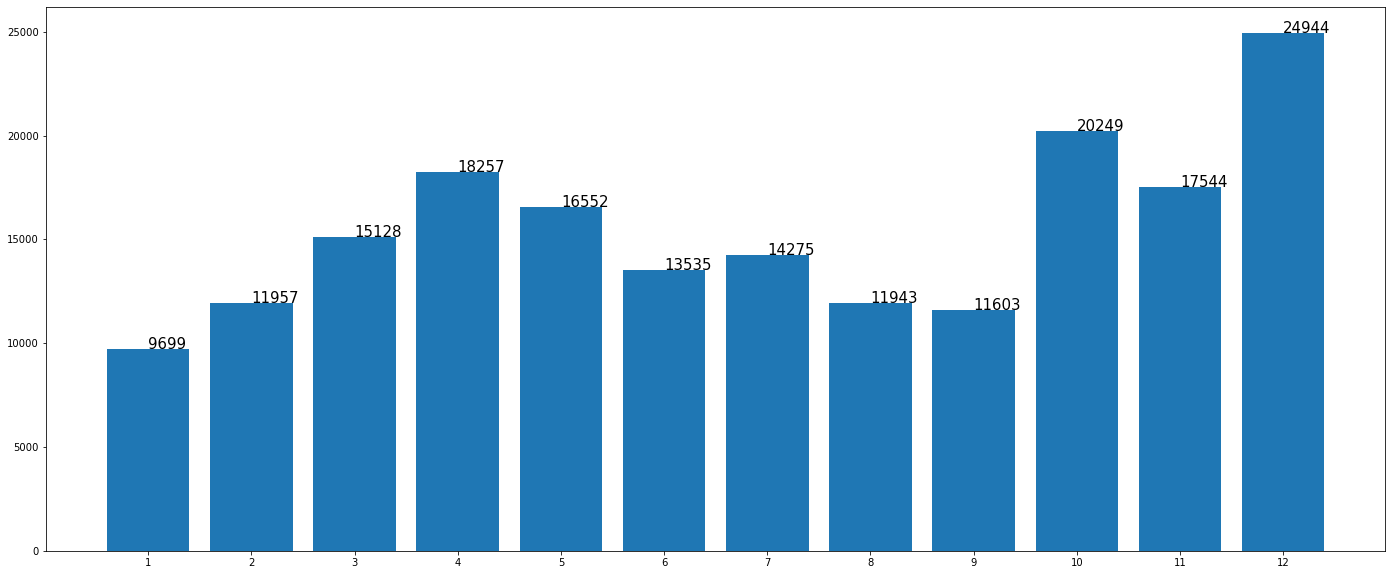

In [20]:
plt.figure(figsize=(24,10))
plt.bar(df_2["Month"],df_2["count"])
for x,y in zip(df_2["Month"],df_2["count"]):    
    plt.text(x,y,y,size=15,color="k")
plt.xticks(range(1,13))    
plt.show()    

# Which month have the most Sale

In [21]:
x=Sale_data1.groupby(by="Month")
df_2=pd.DataFrame(x.Sale.sum()).reset_index()
df_2.columns=["Month","Sale"]

In [22]:
df_2["Sale"]=df_2["Sale"].astype(int)

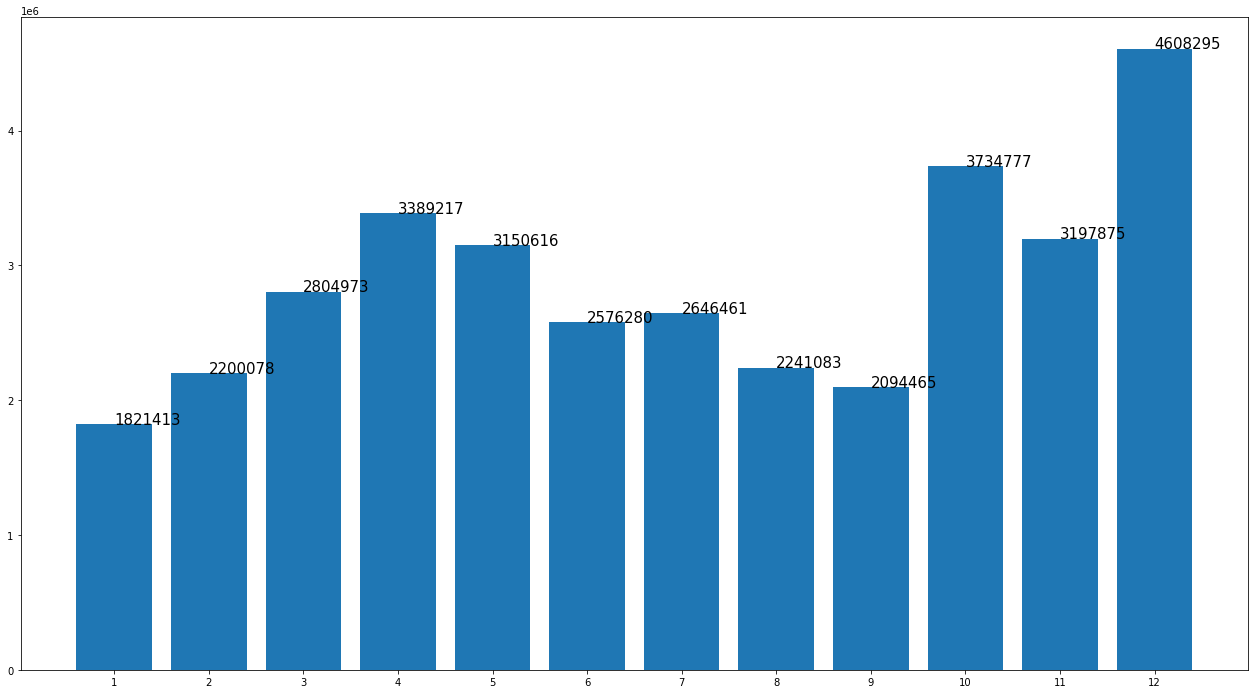

In [23]:
plt.figure(figsize=(22,12))
plt.bar(df_2["Month"],df_2["Sale"])
for x,y in zip(df_2["Month"],df_2["Sale"]):
    plt.text(x,y,y,size=15,color="k")
plt.xticks(range(1,13))
plt.show()

In [24]:
Sale_data1["Day"]=Sale_data1["Order Date"].dt.day

<ipython-input-24-a336ebf3f05b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sale_data1["Day"]=Sale_data1["Order Date"].dt.day


In [25]:
Sale_data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Hour,Month,Date,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,8,4,2019-04-19,19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,22,4,2019-04-07,7
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,14,4,2019-04-12,12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,14,4,2019-04-12,12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,9,4,2019-04-30,30
...,...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,20,9,2019-09-17,17
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,16,9,2019-09-01,1
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,7,9,2019-09-23,23
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,17,9,2019-09-19,19


In [26]:
Sale_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186848
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Sale              185686 non-null  float64       
 7   Hour              185686 non-null  int64         
 8   Month             185686 non-null  int64         
 9   Date              185686 non-null  object        
 10  Day               185686 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(4)
memory usage: 13.5+ MB


In [27]:
Sale_data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Hour,Month,Date,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,8,4,2019-04-19,19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,22,4,2019-04-07,7
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,14,4,2019-04-12,12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,14,4,2019-04-12,12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,9,4,2019-04-30,30
...,...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,20,9,2019-09-17,17
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,16,9,2019-09-01,1
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,7,9,2019-09-23,23
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,17,9,2019-09-19,19


In [28]:
c=Sale_data1.groupby(by="Date")
df_3=pd.DataFrame(c.Sale.sum()).reset_index()
df_3.columns=["Date","Sale"]
df_3
#df_3.sort_values(by="Date",ascending=True,inplace=True)
#df_2.sort_values(by='Hours',ascending=True,inplace=True)

,Date,Sale
0,2019-01-01,65681.94
1,2019-01-02,70663.20
2,2019-01-03,47046.20
3,2019-01-04,62000.22
4,2019-01-05,46524.63
...,...,...
361,2019-12-28,133601.53
362,2019-12-29,156009.67
363,2019-12-30,151857.82
364,2019-12-31,131439.32


In [29]:
c=Sale_data1.groupby(by="Date")
df_3=pd.DataFrame(c.Sale.sum()).reset_index()
df_3.columns=["Date","Sale"]

# Which month & year has the most sale

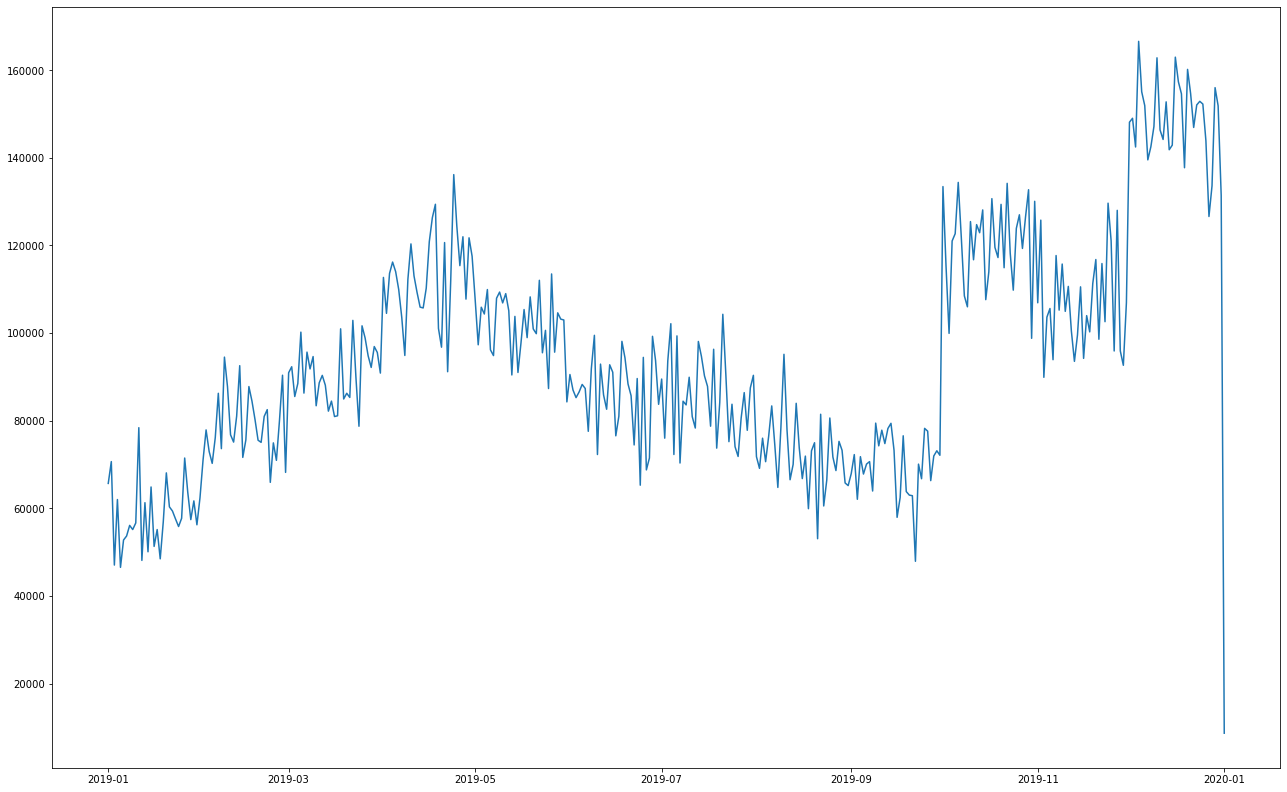

In [30]:
plt.figure(figsize=(22,14))
plt.plot(df_3["Date"],df_3["Sale"])
plt.show()

# Best time to display advertisment for the product as per sale

In [31]:
c=Sale_data1.groupby(by="Hour")
c.Sale.sum().astype(int)

df_4=pd.DataFrame(c.Sale.sum().astype(int)).reset_index()
df_4.columns=["Hour","Sale"]
df_4

,Hour,Sale
0,0,713548
1,1,460563
2,2,234839
3,3,145742
4,4,162546
5,5,230664
6,6,447963
7,7,744067
8,8,1192309
9,9,1638784


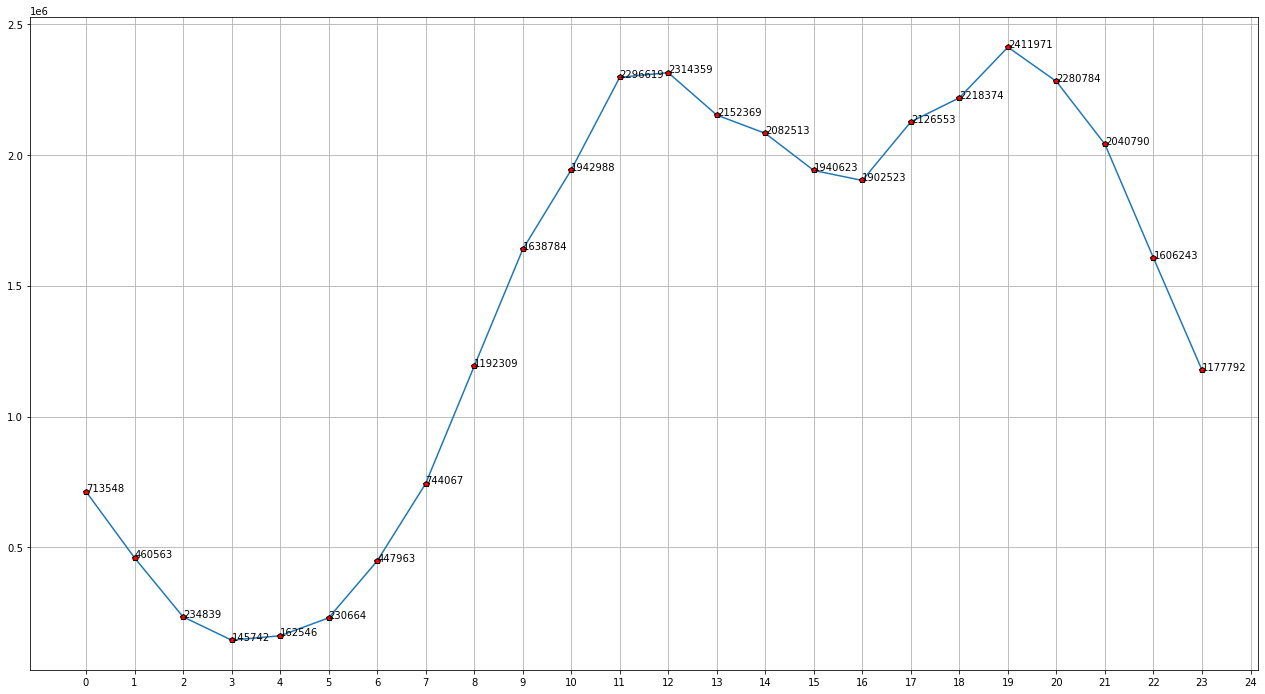

In [32]:
plt.figure(figsize=(22,12))
plt.grid()
plt.plot(df_4["Hour"],df_4["Sale"],marker="p",markeredgecolor="k",markerfacecolor="r")
for x,y in zip(df_4["Hour"],df_4["Sale"]):    
        plt.text(x,y,y)
plt.xticks(range(0,25))
plt.show()

# Best time to display advertisment for the product as per month


In [33]:
Sale_data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Hour,Month,Date,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,8,4,2019-04-19,19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,22,4,2019-04-07,7
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,14,4,2019-04-12,12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,14,4,2019-04-12,12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,9,4,2019-04-30,30
...,...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,20,9,2019-09-17,17
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,16,9,2019-09-01,1
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,7,9,2019-09-23,23
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,17,9,2019-09-19,19


In [34]:
c=Sale_data1.groupby(by="Month")
c.Sale.sum().astype(int)
df_5=pd.DataFrame(c.Sale.sum()).reset_index()
df_5.columns=["Month","Sale"]
df_5.astype(int)

,Month,Sale
0,1,1821413
1,2,2200078
2,3,2804973
3,4,3389217
4,5,3150616
5,6,2576280
6,7,2646461
7,8,2241083
8,9,2094465
9,10,3734777


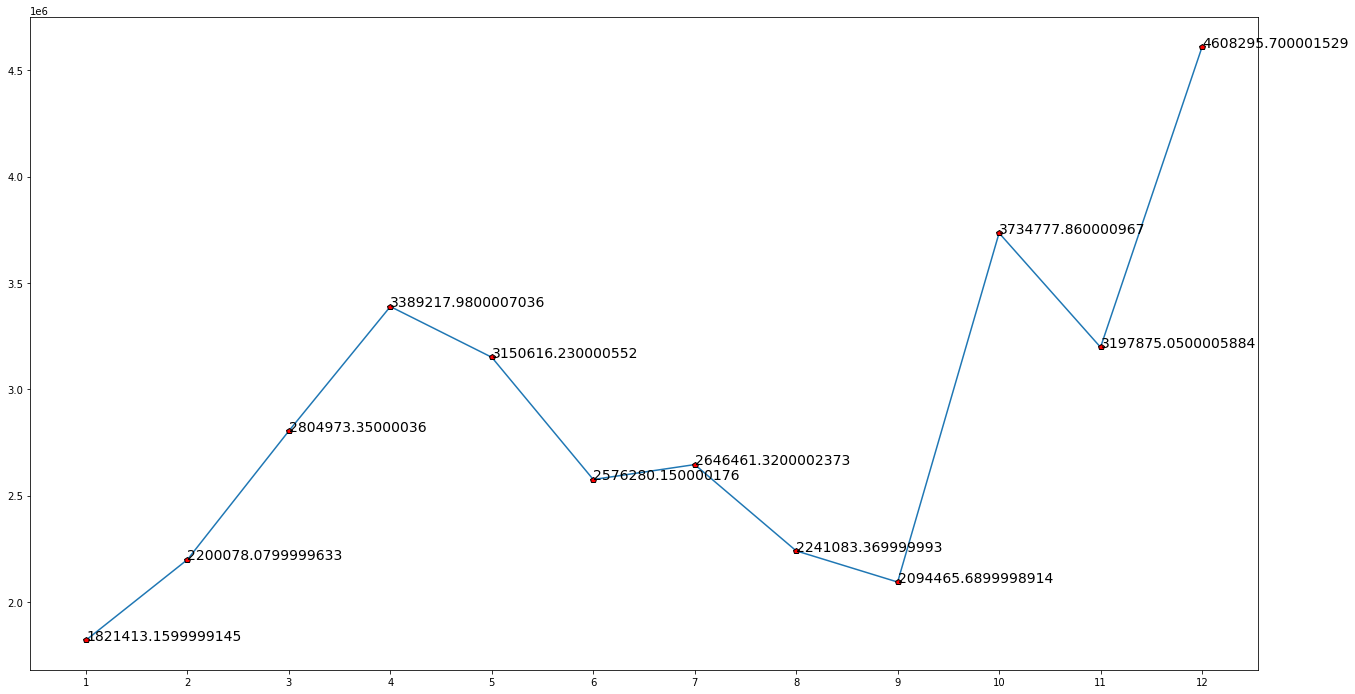

In [35]:
plt.figure(figsize=(22,12))
plt.plot(df_5["Month"],df_5["Sale"],marker="p",markeredgecolor="k",markerfacecolor="r")
plt.xticks(range(1,13))
for x,y in zip(df_5["Month"],df_5["Sale"]):
    plt.text(x,y,y,size=14,color="k")

plt.show()

# Which city has the most order

In [36]:
def m(x):
    return x.split(",")[1]

Sale_data1["City"]=Sale_data1["Purchase Address"].apply(m)

<ipython-input-36-7765af92bde5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sale_data1["City"]=Sale_data1["Purchase Address"].apply(m)


In [37]:
df_6=pd.DataFrame(Sale_data1["City"].value_counts().sort_values()).reset_index()
df_6.columns=["City","count"]
df_6

,City,count
0,Austin,9890
1,Portland,12449
2,Seattle,14713
3,Dallas,14797
4,Atlanta,14863
5,Boston,19901
6,New York City,24847
7,Los Angeles,29564
8,San Francisco,44662


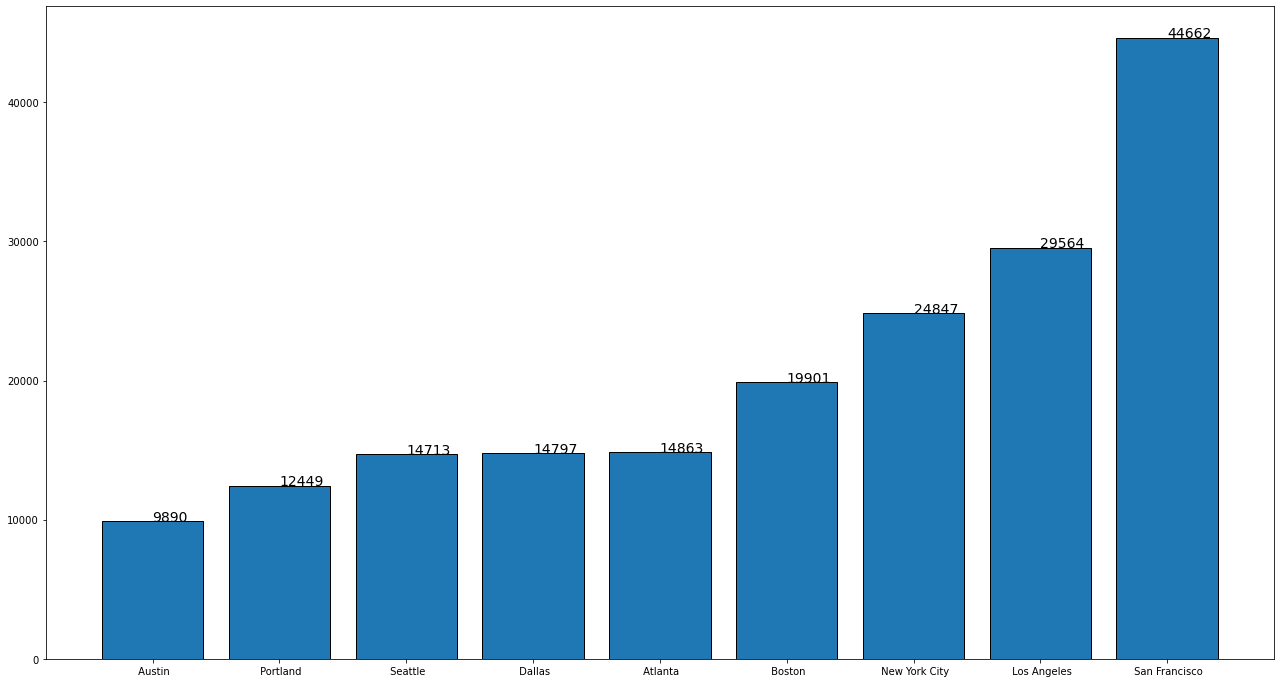

In [38]:
plt.figure(figsize=(22,12))
plt.bar(df_6["City"],df_6["count"],edgecolor="k")
for x,y in zip(df_6["City"],df_6["count"]):
    plt.text(x,y,y,size=14,color="k")

plt.show()

# Those products are most often sold together

In [39]:
df_7=Sale_data[Sale_data["Order ID"].duplicated(keep=False)]

In [40]:
df_7

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
17,176574,Google Phone,1,600,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001"
18,176574,USB-C Charging Cable,1,11.95,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001"
31,176586,AAA Batteries (4-pack),2,2.99,04-10-2019 17:00,"365 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186791,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301"
186802,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186803,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186840,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"


In [41]:
df_7["Group"]=df_7.groupby(by="Order ID")["Product"].transform(lambda x: ",".join(x))


<ipython-input-41-bb8e073f79bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7["Group"]=df_7.groupby(by="Order ID")["Product"].transform(lambda x: ",".join(x))


In [42]:
df_8=pd.DataFrame(df_7["Group"].value_counts().sort_values(ascending=False)).reset_index()
df_8.columns=["Items","Group"]
df_8

,Items,Group
0,"iPhone,Lightning Charging Cable",1772
1,"Google Phone,USB-C Charging Cable",1714
2,"iPhone,Wired Headphones",722
3,"Vareebadd Phone,USB-C Charging Cable",624
4,"Google Phone,Wired Headphones",606
...,...,...
345,"27in FHD Monitor,iPhone",2
346,"LG Washing Machine,AA Batteries (4-pack)",2
347,"LG Washing Machine,27in 4K Gaming Monitor",2
348,"LG Dryer,Lightning Charging Cable",2


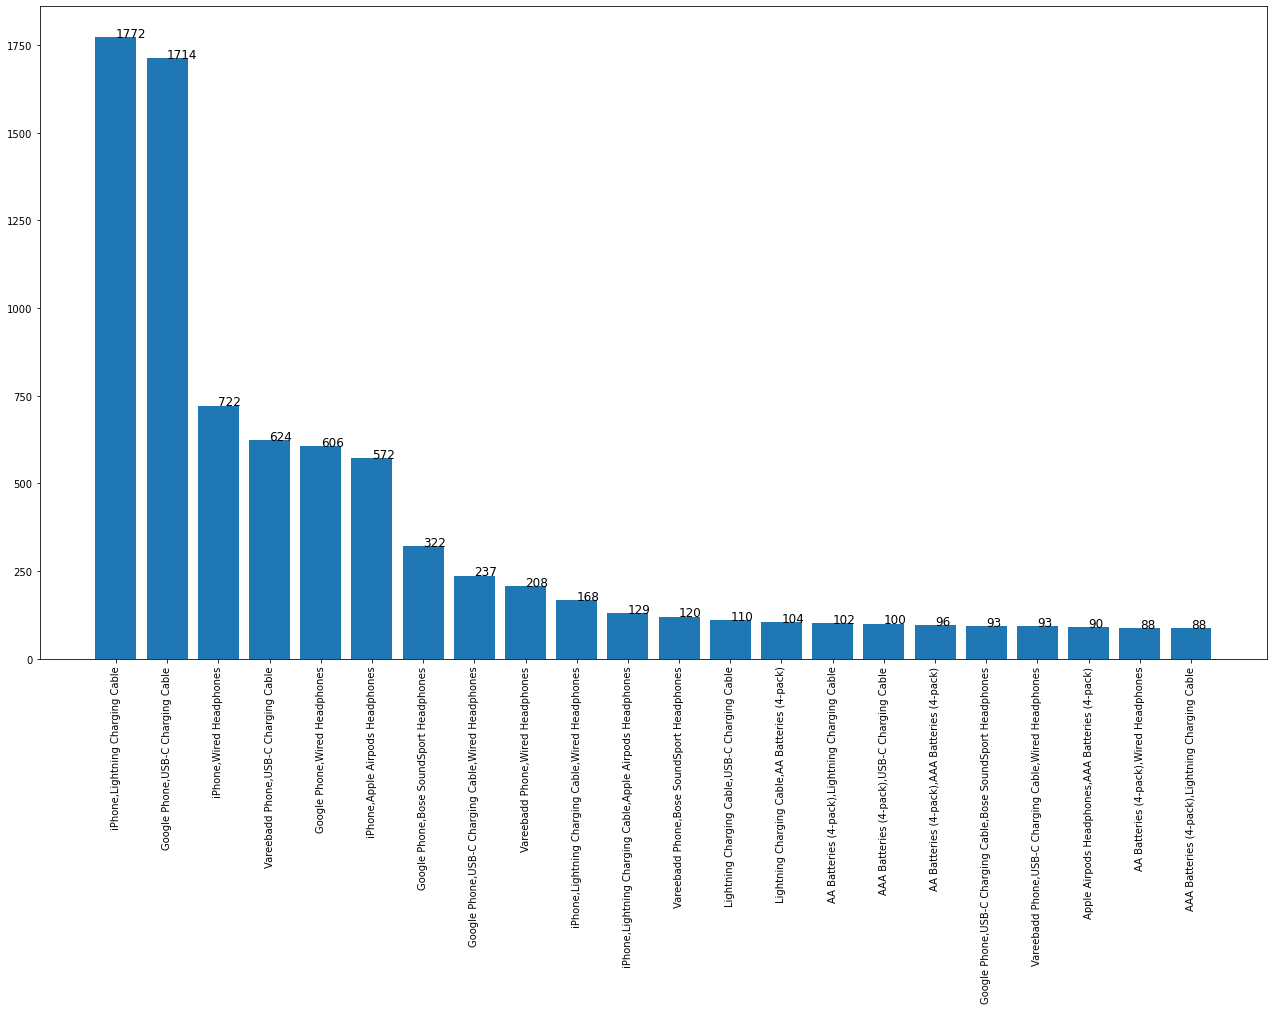

In [43]:
plt.figure(figsize=(22,12))
plt.bar(df_8["Items"][0:22],df_8["Group"][0:22])
plt.xticks(rotation="vertical")
for x,y in zip(df_8["Items"][0:22],df_8["Group"][0:22]):
    plt.text(x,y,y,size=12,color="k")
plt.show()